In [1]:
# Importing all the required Predefined Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datadotworld as ddw
import re
import json
%matplotlib inline
from log_progress import log_progress # https://github.com/alexanderkuk/log-progress

%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#pd.set_option('max_colwidth', 70)

In [2]:
# Importing Required CANCER_REG.CSV file
dataset = "C:\\Users\\kakar\\Desktop\\GitHub\\cancer_reg.csv"

data = pd.read_csv(dataset)

In [3]:
# Reviweing the DATA
data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,"Ellsworth County, Kansas",51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,31.4,"Finney County, Kansas",52.6,26.7,33.9,35.6,3.8,23.1,12.4,70.1,4.6,64.5,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,31.2,"Ford County, Kansas",54.8,19.7,44.5,33.3,2.5,23.0,12.8,64.8,6.4,62.0,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,40.5,"Franklin County, Kansas",58.8,10.9,37.2,NaN,4.1,36.1,14.4,NaN,6.9,75.9,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [4]:
# Checking all the NULL values
data.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

<AxesSubplot:>

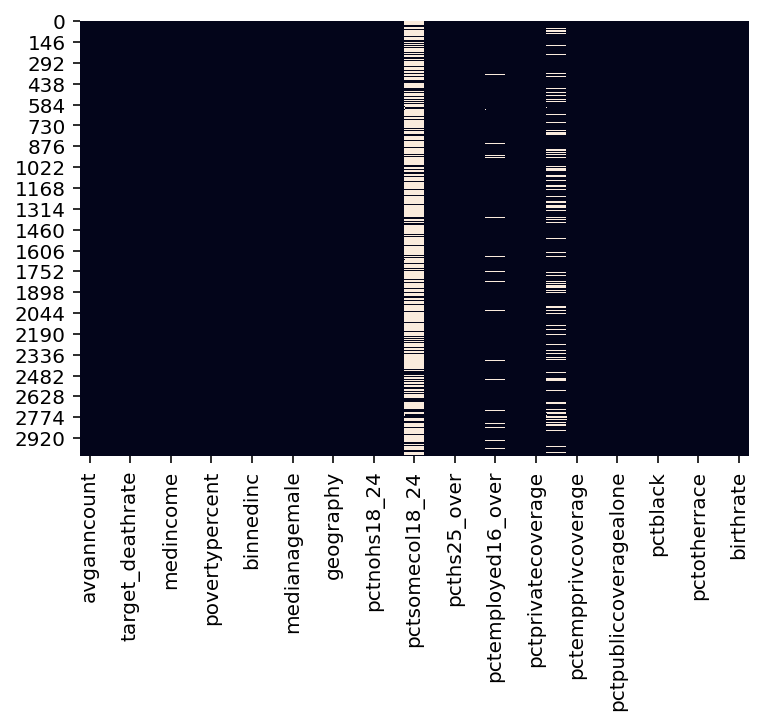

In [5]:
# Checking the null values using the HEATMAP
sns.heatmap(data.isnull(), cbar=False)

In [6]:
# Checking the SHAPE of the data
data.shape

(3047, 33)

In [7]:
# Checking the DATA TYPES of the column values 
data.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [8]:
# DESCRIPTION OF DATA
data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [9]:
#TYPE OF DATA
type(data)

pandas.core.frame.DataFrame

In [10]:
data.drop('pctsomecol18_24', axis=1, inplace=True)

In [11]:
# Replacing the null values with MEAN values

data['pctemployed16_over'].fillna(data['pctemployed16_over'].mean(), inplace= True)
data['pctprivatecoveragealone'].fillna(data['pctprivatecoveragealone'].mean(), inplace= True)


<AxesSubplot:>

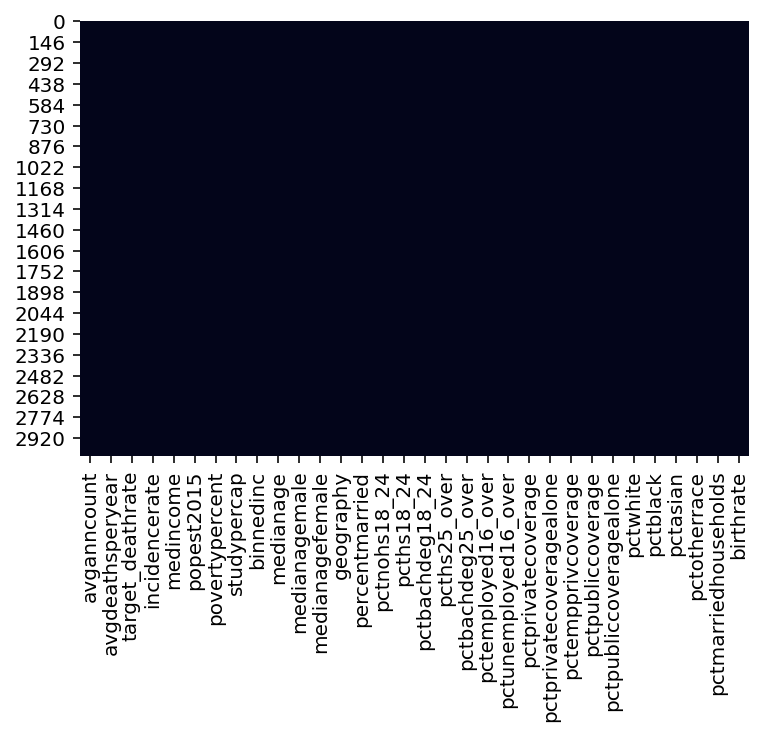

In [12]:
# Confirming the null values
sns.heatmap(data.isnull(), cbar=False)

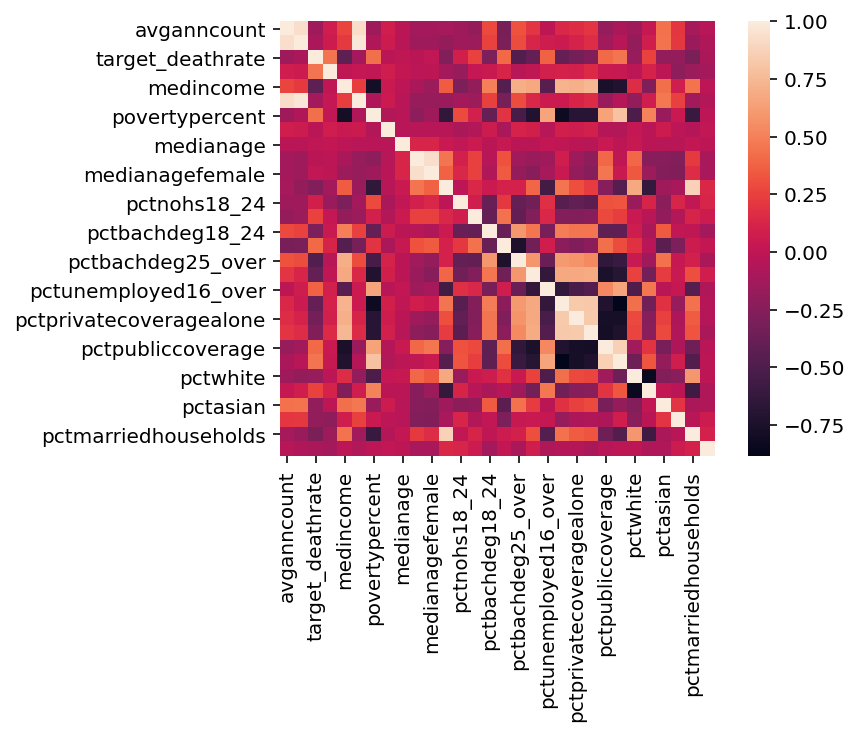

In [13]:
# Finding CORRELATION using HEATMAP
correlation = sns.heatmap(data.corr(),square=True)

In [15]:
# Importing required Functions from SKLEARN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# Taking the training data from original data
y=data.avgdeathsperyear
x=data.drop('avgdeathsperyear',axis=1)

In [20]:
# Spliting data to TEST and TRAIN
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,avganncount,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
2026,81.0,239.8,380.6,32120,17482,28.7,0.000000,"[22640, 34218.1]",37.6,36.3,38.8,"Pemiscot County, Missouri",41.5,23.3,49.8,1.8,37.8,7.8,47.100000,11.2,45.7,48.453774,27.7,47.5,28.0,70.236026,27.157033,0.033638,0.370017,38.709677,6.710775
1431,1269.0,184.3,452.5,36383,141058,20.1,42.535695,"(34218.1, 37413.8]",55.4,54.4,56.1,"Citrus County, Florida",54.6,24.1,42.3,3.2,38.2,11.1,35.800000,13.1,57.6,31.600000,24.7,54.3,24.4,93.291277,2.992395,1.593939,0.279978,51.065364,3.923080
2880,1404.0,181.4,474.4,76856,307343,6.9,0.000000,"(61494.5, 125635]",39.3,38.2,40.2,"McHenry County, Illinois",58.2,14.4,33.2,10.5,26.5,21.7,65.800000,8.0,78.8,48.453774,60.7,22.8,12.5,91.463347,1.345992,2.633745,2.641228,61.798687,4.286142
11,740.0,172.7,499.3,51395,121846,15.7,837.122269,"(51046.4, 54545.6]",41.0,40.0,42.2,"Skagit County, Washington",53.6,25.5,33.8,3.1,26.7,15.9,54.152642,8.2,64.4,48.453774,38.0,38.1,20.2,85.590273,0.806080,1.887836,6.226591,52.937327,5.818153
865,128.0,194.0,478.1,36994,16931,20.3,0.000000,"(34218.1, 37413.8]",49.8,49.5,50.1,"Piscataquis County, Maine",52.8,16.0,42.0,3.5,40.5,11.9,45.800000,10.5,53.8,35.500000,30.9,50.6,25.8,96.572628,0.373047,0.466309,0.320588,48.824545,6.290472


In [21]:
# Shape
x_train.shape

(2437, 31)

In [22]:
# HEAD OF THE DATA X_TEST
x_test.head()

,avganncount,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
1647,130.0,206.9,435.2,38081,23257,22.6,42.997807,"(37413.8, 40362.7]",42.3,42.0,42.8,"Meigs County, Ohio",53.8,18.2,41.7,8.0,43.5,8.3,46.4,12.1,56.9,40.700000,37.3,45.9,27.4,97.482214,1.111916,0.191710,0.038342,52.456554,5.707001
2325,409.0,137.4,420.4,51440,110089,15.5,36.334239,"(51046.4, 54545.6]",32.4,32.1,32.8,"Bonneville County, Idaho",56.8,16.7,40.7,5.6,27.5,19.1,60.8,5.6,70.0,55.800000,44.7,28.7,15.0,90.223401,0.455524,0.837756,5.401343,58.567301,7.807625
2926,215.0,163.5,469.4,70127,39227,6.3,2141.382211,"(61494.5, 125635]",39.9,38.8,41.0,"Woodford County, Illinois",59.1,14.7,30.5,6.9,32.7,19.8,61.5,5.9,80.7,48.453774,57.1,27.9,12.6,96.801002,0.583031,0.779931,0.611159,62.055749,6.403883
1484,3000.0,146.4,410.8,52109,405549,10.8,199.729256,"(51046.4, 54545.6]",54.0,52.2,55.5,"Sarasota County, Florida",53.5,14.6,38.9,6.4,30.2,19.3,45.6,8.2,66.2,41.100000,30.9,43.9,17.2,91.176110,4.713574,1.463123,0.769313,49.339841,3.947723
1487,240.0,198.7,421.4,38177,43760,23.7,0.000000,"(37413.8, 40362.7]",41.6,40.5,43.6,"Suwannee County, Florida",47.7,29.0,40.8,2.0,40.8,8.8,44.5,11.1,48.9,33.000000,27.0,47.9,27.4,82.764078,13.535956,0.318844,1.167565,49.345006,3.389044


In [23]:
# Shape of X_TEST
x_test.shape

(610, 31)

In [24]:
x_train

,avganncount,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
2026,81.000000,239.8,380.600000,32120,17482,28.7,0.000000,"[22640, 34218.1]",37.6,36.3,38.8,"Pemiscot County, Missouri",41.5,23.3,49.8,1.8,37.8,7.8,47.100000,11.2,45.7,48.453774,27.7,47.5,28.0,70.236026,27.157033,0.033638,0.370017,38.709677,6.710775
1431,1269.000000,184.3,452.500000,36383,141058,20.1,42.535695,"(34218.1, 37413.8]",55.4,54.4,56.1,"Citrus County, Florida",54.6,24.1,42.3,3.2,38.2,11.1,35.800000,13.1,57.6,31.600000,24.7,54.3,24.4,93.291277,2.992395,1.593939,0.279978,51.065364,3.923080
2880,1404.000000,181.4,474.400000,76856,307343,6.9,0.000000,"(61494.5, 125635]",39.3,38.2,40.2,"McHenry County, Illinois",58.2,14.4,33.2,10.5,26.5,21.7,65.800000,8.0,78.8,48.453774,60.7,22.8,12.5,91.463347,1.345992,2.633745,2.641228,61.798687,4.286142
11,740.000000,172.7,499.300000,51395,121846,15.7,837.122269,"(51046.4, 54545.6]",41.0,40.0,42.2,"Skagit County, Washington",53.6,25.5,33.8,3.1,26.7,15.9,54.152642,8.2,64.4,48.453774,38.0,38.1,20.2,85.590273,0.806080,1.887836,6.226591,52.937327,5.818153
865,128.000000,194.0,478.100000,36994,16931,20.3,0.000000,"(34218.1, 37413.8]",49.8,49.5,50.1,"Piscataquis County, Maine",52.8,16.0,42.0,3.5,40.5,11.9,45.800000,10.5,53.8,35.500000,30.9,50.6,25.8,96.572628,0.373047,0.466309,0.320588,48.824545,6.290472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,1962.667684,180.2,453.549422,44199,16398,17.4,0.000000,"(42724.4, 45201]",35.9,34.1,37.4,"Atchison County, Kansas",45.6,5.0,22.8,8.7,41.0,12.7,57.300000,7.3,69.3,53.100000,46.0,32.0,15.6,90.572957,4.094270,0.336680,0.402814,47.107575,6.012885
2840,309.000000,193.2,409.000000,34354,56486,24.6,0.000000,"(34218.1, 37413.8]",43.6,42.4,44.9,"Carter County, Tennessee",53.2,11.7,35.9,6.1,38.9,10.7,49.200000,8.1,57.9,40.600000,34.8,42.9,22.8,96.684287,1.283785,0.338947,0.091323,50.552440,3.668414
195,515.000000,167.9,517.800000,43892,77922,16.2,0.000000,"(42724.4, 45201]",41.4,40.6,42.1,"Cattaraugus County, New York",48.7,18.3,32.9,5.5,40.9,10.3,54.300000,8.2,67.3,48.453774,44.0,39.8,18.7,92.232973,1.579241,0.832046,0.441985,46.903746,4.820525
68,56.000000,168.1,528.400000,36466,6966,17.1,0.000000,"(34218.1, 37413.8]",47.7,47.0,48.4,"Tucker County, West Virginia",60.5,7.0,50.6,0.0,52.7,7.1,51.700000,7.6,68.0,48.453774,46.1,39.3,17.9,98.164085,0.229489,0.602410,0.000000,56.877076,3.868613


In [25]:
# Finding NULL values
x_train.isnull().sum()

avganncount                0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

In [26]:
# Dropping the COLUMNS WHICH ARE HAVING NULL VALUES MORE THAN 50%

x_train.drop('binnedinc',axis=1,inplace=True )
x_train.drop('geography',axis=1,inplace=True )
x_test.drop('binnedinc',axis=1,inplace=True )
x_test.drop('geography',axis=1,inplace=True )

C:\Users\kakar\anaconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
# NULL values in y_train

y_train.isnull().sum()

0

In [28]:
y_train

2026     52
1431    557
2880    502
11      269
865      53
       ... 
3020     37
2840    152
195     171
68       19
1581    152
Name: avgdeathsperyear, Length: 2437, dtype: int64

In [29]:
x_test

,avganncount,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
1647,130.000000,206.9,435.200000,38081,23257,22.6,42.997807,42.3,42.0,42.8,53.8,18.2,41.7,8.0,43.5,8.3,46.4,12.1,56.9,40.700000,37.3,45.9,27.4,97.482214,1.111916,0.191710,0.038342,52.456554,5.707001
2325,409.000000,137.4,420.400000,51440,110089,15.5,36.334239,32.4,32.1,32.8,56.8,16.7,40.7,5.6,27.5,19.1,60.8,5.6,70.0,55.800000,44.7,28.7,15.0,90.223401,0.455524,0.837756,5.401343,58.567301,7.807625
2926,215.000000,163.5,469.400000,70127,39227,6.3,2141.382211,39.9,38.8,41.0,59.1,14.7,30.5,6.9,32.7,19.8,61.5,5.9,80.7,48.453774,57.1,27.9,12.6,96.801002,0.583031,0.779931,0.611159,62.055749,6.403883
1484,3000.000000,146.4,410.800000,52109,405549,10.8,199.729256,54.0,52.2,55.5,53.5,14.6,38.9,6.4,30.2,19.3,45.6,8.2,66.2,41.100000,30.9,43.9,17.2,91.176110,4.713574,1.463123,0.769313,49.339841,3.947723
1487,240.000000,198.7,421.400000,38177,43760,23.7,0.000000,41.6,40.5,43.6,47.7,29.0,40.8,2.0,40.8,8.8,44.5,11.1,48.9,33.000000,27.0,47.9,27.4,82.764078,13.535956,0.318844,1.167565,49.345006,3.389044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,1962.667684,153.9,453.549422,65373,23298,10.0,0.000000,34.7,34.7,34.6,62.3,9.2,35.0,6.5,31.2,21.2,64.8,3.7,80.4,66.000000,52.1,23.8,10.7,94.086188,1.290608,0.901657,0.685083,62.609863,8.095893
206,90.000000,187.4,514.800000,64305,16269,8.8,0.000000,40.7,40.0,41.5,58.5,5.7,36.6,9.3,39.4,12.5,63.0,5.4,75.6,62.700000,55.5,25.5,13.5,76.523576,19.544014,0.869727,0.217432,60.487078,6.631717
702,227.000000,174.7,471.400000,56573,39165,14.7,0.000000,43.7,42.7,44.8,56.4,14.8,36.9,5.7,35.8,15.9,54.1,8.5,71.8,55.600000,45.8,32.9,15.6,69.619210,27.649817,0.669861,1.076931,58.143608,5.282646
1798,25.000000,136.9,305.100000,58425,5969,8.6,0.000000,40.7,40.4,41.1,58.0,26.7,24.7,5.4,28.4,15.4,61.5,1.7,74.1,61.100000,55.0,23.4,9.4,95.566908,1.071193,0.346078,0.428477,58.613171,6.235913


In [30]:
# MAX values in y_test
y_test.max()

9445

In [31]:
y_test

1647      62
2325     134
2926      80
1484    1247
1487     120
        ... 
1336      36
206       32
702       85
1798      11
2593      16
Name: avgdeathsperyear, Length: 610, dtype: int64

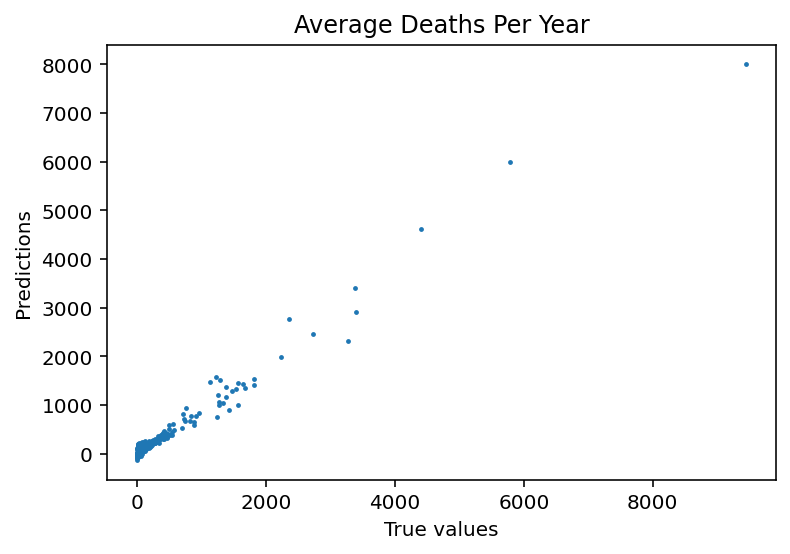

In [32]:
# Final task which is prediction using the LINEAR REGRESSION


from sklearn.linear_model import LinearRegression as lm
x_train = x_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')
model=lm().fit(x_train,y_train)

predictions=model.predict(x_test)



import matplotlib.pyplot as plt
plt.scatter(y_test,predictions,s=2)
plt.xlabel('True values')
plt.title('Average Deaths Per Year')
plt.ylabel('Predictions')
plt.show()

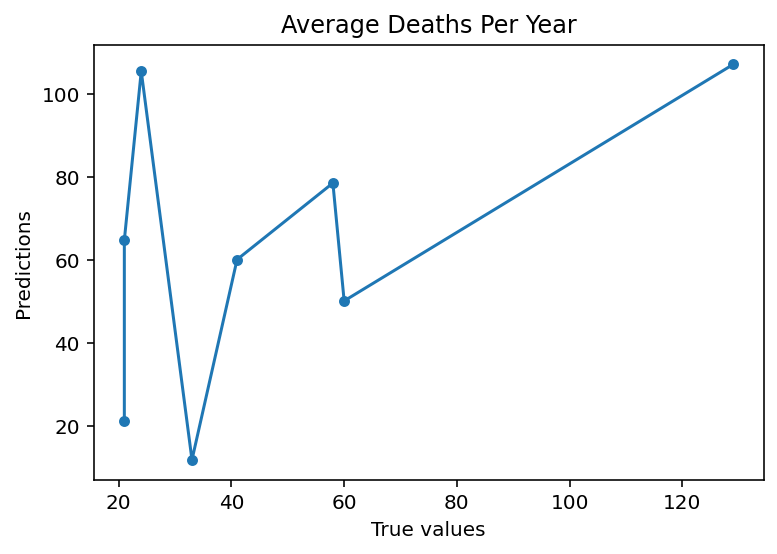

In [37]:
#Buffer Analysis

y= y_test[115:123]
p = predictions[115:123]
y.sort_values(axis=0, ascending=True, inplace=True)
plt.plot(y,p)
plt.scatter(y,p,s=20)
plt.title('Average Deaths Per Year')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

In [38]:
p

array([ 21.17467126,  64.75283745, 105.49120388,  11.77465066,
        60.07516428,  78.52609957,  50.09939329, 107.11744203])

In [39]:
y

2964     21
3007     21
977      24
2225     33
1742     41
1173     58
2737     60
1861    129
Name: avgdeathsperyear, dtype: int64